# HW5: MapReduce

While mapreduce is an important concept in large scale parallel systems it is possible to simulate it locally and on small practice problems.  To this end we provide a simple framework that allows you to run and test map/reduce functions below.  This assignment asks you to write the code for two, two-stage mapreduce problems.

In [1]:
from collections import defaultdict
import string
import numpy as np

def simple_mapreduce(map_fn, reduce_fn, kvin):
    keyvalues = defaultdict(list)
    for k, v in kvin:
        for outk, outv in map_fn(k, v):
            keyvalues[outk] += [outv]
    kvout = []
    for k, vs in keyvalues.items():
        for outk, outv in reduce_fn(k, vs):
            kvout += [(outk, outv)]
    return kvout


## Example data
Some small speeches that are provided as an example dataset to play with 

In [2]:
speech_dataset = [
    ("emmeline pankhurst", """You have left it to women in your land, the men of all civilised countries have left it to women, to work out their own salvation. That is the way in which we women of England are doing. Human life for us is sacred, but we say if any life is to be sacrificed it shall be ours; we won’t do it ourselves, but we will put the enemy in the position where they will have to choose between giving us freedom or giving us death."""),
    ("gettysburg address", """Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.  But, in a larger sense, we can not dedicate -- we can not consecrate -- we can not hallow -- this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us -- that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion -- that we here highly resolve that these dead shall not have died in vain -- that this nation, under God, shall have a new birth of freedom -- and that government of the people, by the people, for the people, shall not perish from the earth."""),
    ("churchill address", """I have, myself, full confidence that if all do their duty, if nothing is neglected, and if the best arrangements are made, as they are being made, we shall prove ourselves once again able to defend our Island home, to ride out the storm of war, and to outlive the menace of tyranny, if necessary for years, if necessary alone. At any rate, that is what we are going to try to do. That is the resolve of His Majesty's Government-every man of them. That is the will of Parliament and the nation. The British Empire and the French Republic, linked together in their cause and in their need, will defend to the death their native soil, aiding each other like good comrades to the utmost of their strength. Even though large tracts of Europe and many old and famous States have fallen or may fall into the grip of the Gestapo and all the odious apparatus of Nazi rule, we shall not flag or fail. We shall go on to the end, we shall fight in France, we shall fight on the seas and oceans, we shall fight with growing confidence and growing strength in the air, we shall defend our Island, whatever the cost may be, we shall fight on the beaches, we shall fight on the landing grounds, we shall fight in the fields and in the streets, we shall fight in the hills; we shall never surrender, and even if, which I do not for a moment believe, this Island or a large part of it were subjugated and starving, then our Empire beyond the seas, armed and guarded by the British Fleet, would carry on the struggle, until, in God's good time, the New World, with all its power and might, steps forth to the rescue and the liberation of the old."""),
    ("mlk dream", """    I have a dream that one day down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of interposition and nullification – one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.    I have a dream today.  I have a dream that one day every valley shall be exalted and every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight, and the glory of the Lord shall be revealed and all flesh shall see it together."""),
    ("hrc human rights", """‘If there is one message that echoes forth from this conference, let it be that human rights are women’s rights and women’s rights are human rights once and for all. Let us not forget that among those rights are the right to speak freely — and the right to be heard.’""")
]

## Example usage

This simple example takes the above data and counts the occurrence of words using a mapreduce algorithm
Notice the use of yield instead of return.  yield is similar to return but for this purpose it allows us to return more than one time.

In [3]:
#k = title, v = text of speech
def ex1_map1(k, v):
    words = v.lower().split()  # simple tokenization, split by whitespaces
    for word in words:
        yield word, 1
    
# k = bigram, values = 1 for each bigram
def ex1_reduce1(k, values):
    yield k, sum(values)
    
sorted(simple_mapreduce(ex1_map1, ex1_reduce1, speech_dataset), key=lambda x: -x[1])

[('the', 51),
 ('and', 34),
 ('we', 27),
 ('to', 25),
 ('that', 23),
 ('of', 20),
 ('shall', 20),
 ('in', 17),
 ('have', 12),
 ('be', 12),
 ('a', 12),
 ('it', 11),
 ('is', 11),
 ('are', 10),
 ('for', 9),
 ('will', 8),
 ('not', 8),
 ('their', 7),
 ('us', 7),
 ('on', 7),
 ('--', 7),
 ('fight', 7),
 ('all', 6),
 ('if', 6),
 ('or', 6),
 ('with', 6),
 ('they', 5),
 ('our', 5),
 ('this', 5),
 ('can', 5),
 ('here', 5),
 ('i', 5),
 ('rights', 5),
 ('which', 4),
 ('do', 4),
 ('one', 4),
 ('human', 3),
 ('but', 3),
 ('any', 3),
 ('forth', 3),
 ('new', 3),
 ('nation,', 3),
 ('dedicated', 3),
 ('great', 3),
 ('so', 3),
 ('as', 3),
 ('who', 3),
 ('little', 3),
 ('what', 3),
 ('from', 3),
 ('people,', 3),
 ('defend', 3),
 ('its', 3),
 ('dream', 3),
 ('day', 3),
 ('right', 3),
 ('made', 3),
 ('left', 2),
 ('women', 2),
 ('men', 2),
 ('work', 2),
 ('out', 2),
 ('life', 2),
 ('say', 2),
 ('giving', 2),
 ('freedom', 2),
 ('conceived', 2),
 ('war,', 2),
 ('nation', 2),
 ('long', 2),
 ('dedicate', 2),
 ('

## Q1 Bigram statistics:
Bigrams are two symbols that occur adjacently.  In this case the symbols are simply letters.  Below is a function `make_bigrams` that will turn a length of text into a list of bigrams.  Your job is to create a 2 step mapreduce function that first calculates the occurrence of bigrams and then in a second step calculates the average occurrence of bigrams that start with a particular letter.  Replace the `pass`'s with your code

In [4]:
# you may use this function that converts a string of text into bigrams THE -> th he
def make_bigrams(text):
    just_txt = [c.lower() for c in text if c in string.ascii_letters]
    bigrams = [a + b for a,b in zip(just_txt[:-1], just_txt[1:])]
    return bigrams

#k = title, v = text
def q1_map1(k, v):
    '''
        Calculating bigram using make_bigram function
        The result of bigrams will be some thing like ['yo', 'ou', .... etc.,]
    '''
    bigrams = make_bigrams(v) 
    for i in bigrams:
        '''
            Each bigram we are setting intial value ie 1. yield will create a generator object for each value.
            It will send value some thing like this to reduce : (yo, 1)
        '''
        yield i, 1 
        

# k = bigram, values = 1 for each bigram
def q1_reduce1(k, values):
    '''
        This function will take the values from map function and add things if k is matching 
        ie if there are two "yo" then count will increase to 2
        out put of below will be some thing like [('yo', 2), ('zi', 3) ... etc]
    '''
    yield k, sum(values)

# k = bigram, v the count for each bigram    
def q1_map2(k, v):
    '''
        using index method we are considering only the starting character of the input.
        in last stage we conculded we may get out put like ('yo', 2) this will be the input of this function
        we are taking only the first character of the k value and passing the count for further procession
        output will be something like ('y*', [2, 7, 7, 3, 5])
        There is so many words will be star with y like yo, yt, yi etc. the list contain count of each bigram
    '''
    yield f'{k[0]}*', v
    
# k = the first letter of the bigram, v = a list of the # of bigrams that start with k  
def q1_reduce2(k, values):
    '''
        From the list of count value finding average.
    '''
    yield k, sum(values)/len(values)
    
    
first_stage = simple_mapreduce(q1_map1, q1_reduce1, speech_dataset)
bigram_final = simple_mapreduce(q1_map2, q1_reduce2, first_stage)

bigram_final

[('y*', 2.7058823529411766),
 ('o*', 10.826086956521738),
 ('u*', 6.090909090909091),
 ('h*', 17.923076923076923),
 ('a*', 14.95),
 ('v*', 14.25),
 ('e*', 19.82608695652174),
 ('l*', 9.0),
 ('f*', 6.5),
 ('t*', 17.05),
 ('i*', 13.166666666666666),
 ('w*', 9.555555555555555),
 ('m*', 6.777777777777778),
 ('n*', 11.6),
 ('r*', 9.952380952380953),
 ('d*', 8.105263157894736),
 ('c*', 7.2),
 ('s*', 8.428571428571429),
 ('k*', 1.4285714285714286),
 ('g*', 5.9375),
 ('b*', 5.333333333333333),
 ('p*', 4.222222222222222),
 ('q*', 1.0),
 ('j*', 1.0),
 ('z*', 1.0),
 ('x*', 1.0)]

In [5]:
bigram_expected = [
 ('y*', 2.7058823529411766),
 ('o*', 10.826086956521738),
 ('u*', 6.090909090909091),
 ('h*', 17.923076923076923),
 ('a*', 14.95),
 ('v*', 14.25),
 ('e*', 19.82608695652174),
 ('l*', 9.0),
 ('f*', 6.5),
 ('t*', 17.05),
 ('i*', 13.166666666666666),
 ('w*', 9.555555555555555),
 ('m*', 6.777777777777778),
 ('n*', 11.6),
 ('r*', 9.952380952380953),
 ('d*', 8.105263157894736),
 ('c*', 7.2),
 ('s*', 8.428571428571429),
 ('k*', 1.4285714285714286),
 ('g*', 5.9375),
 ('b*', 5.333333333333333),
 ('p*', 4.222222222222222),
 ('q*', 1.0),
 ('j*', 1.0),
 ('z*', 1.0),
 ('x*', 1.0)
]
# Testing with result
sorted(bigram_expected) == sorted(bigram_final)

True

## Q2: 

The input given to you describes a dataset of nodes connected to each other via edges. An example of such a network could be the Twitter follower network, in which the users denote nodes and two nodes are connected by an edge if one follows the other.

 * The **degree** of a node in a network is the number of connections it has to other nodes. 
 * The **degree distribution** is the distribution of these degrees over the whole network.

As an example, you can assume that the input you are given is an edgelist in the form of a table as shown below. This table shows pairs of edges connected to each other and thus capture the graph shown on the right:

Source | Destination 
-------|-------------
 A | B
 A | C
 A | D 
 B | C

 
 The degree distribution then is 
 
 Degree | Count
 -------|-------
 1      | 1
 2      | 2
 3      | 1
 
 As you can see, we have one nodes with degree 1 (which is D), two node with degree 2 (which is B and C), and one node with degree 3 (which is A). Thus, the degree distribution captures, for each value of degree, the number of nodes that have that degree.  Below you can see the network mapped out

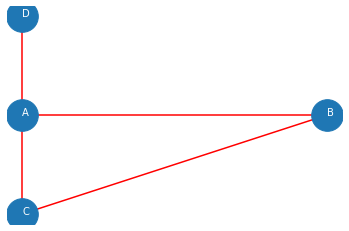

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
 
plt.axis("off")
plt.scatter( [0, 0, 1, 0], [1, 0, 0, -1], s=1000, marker='o')
# Annotate with text + Arrow
plt.plot([0, 0], [-1, 1], c="r", zorder=-1)
plt.plot([0, 1], [0, 0],  c="r", zorder=-1)
plt.plot([0, 1], [-1, 0], c="r", zorder=-1)


plt.annotate('A', xy=(0, 0), xytext=(0, 0), c="w")
plt.annotate('B', xy=(1, 0), xytext=(1, 0), c="w")
plt.annotate('C', xy=(0, -1), xytext=(0, -1), c="w")
plt.annotate('D', xy=(0, 1), xytext=(0, 1), c="w");


In [7]:
network_dataset = [
    ('A', 'B'),
    ('A', 'C'),
    ('A', 'D'),
    ('B', 'C')
]

network_expected = [
    (3, 1),
    (2, 2),
    (1, 1)
]

For Q2: you are to write the body of the following functions: (replace the `pass`'s with your code

In [8]:
# k=source node, v=destination node
def q2_map1(k, v):
    '''
        Here we are using two generator object because we need to get 
        values from both source and destination node.
    '''
    yield v, len(k)
    yield k, len(v)
    
def q2_reduce1(k, values):
    '''
        Each source node will then return count of nodes they are connecting.
    '''
    yield k, sum(values)
    
def q2_map2(k, v):
    '''
        Since out put we need only degree distribution. create generator object for valuess
    '''
    yield v, 1

def q2_reduce2(k, values):
    '''
        Adding values to generate final result
    '''
    yield k, sum(values)

first_stage = simple_mapreduce(q2_map1, q2_reduce1, network_dataset)
network_final = simple_mapreduce(q2_map2, q2_reduce2, first_stage)
network_final

[(2, 2), (3, 1), (1, 1)]

In [9]:
# Testing output with result 
sorted(network_expected) == sorted(network_final)

True